<a href="https://colab.research.google.com/github/shrutikamokashi/Heart-Failure-Prediction-with-two-datasets/blob/main/HeartFailurePrediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data definition
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


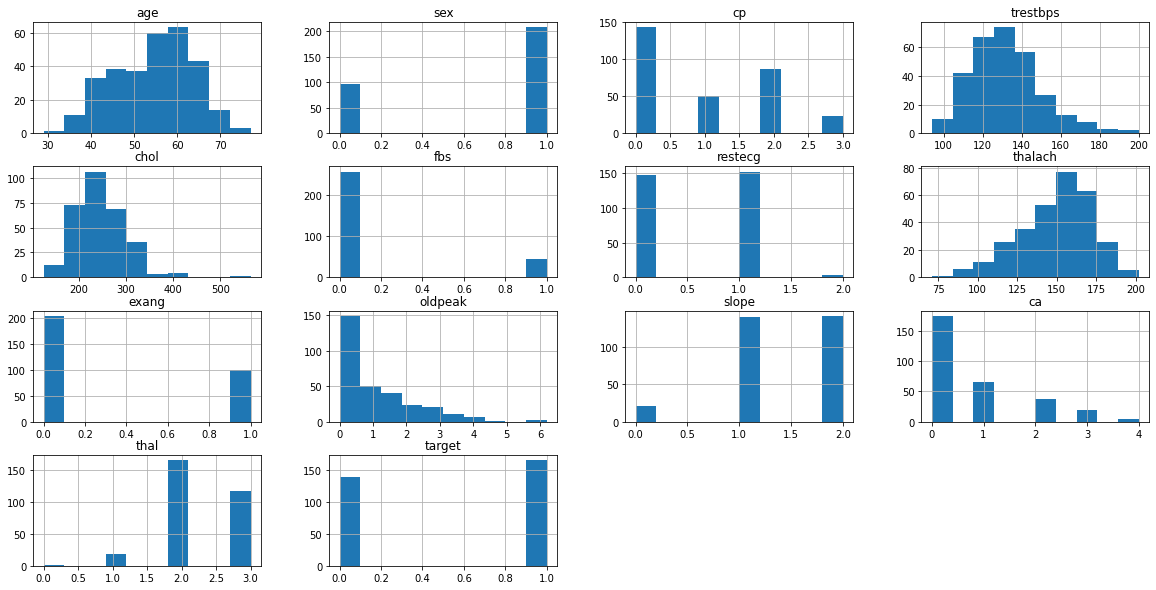

In [ ]:
features=data.columns
data[features].hist(figsize=(20,10))
plt.show()

In [ ]:
ds = data['age'].value_counts().reset_index()
ds.columns = ['age', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="age", 
    title='age distribution'
)

fig.show()

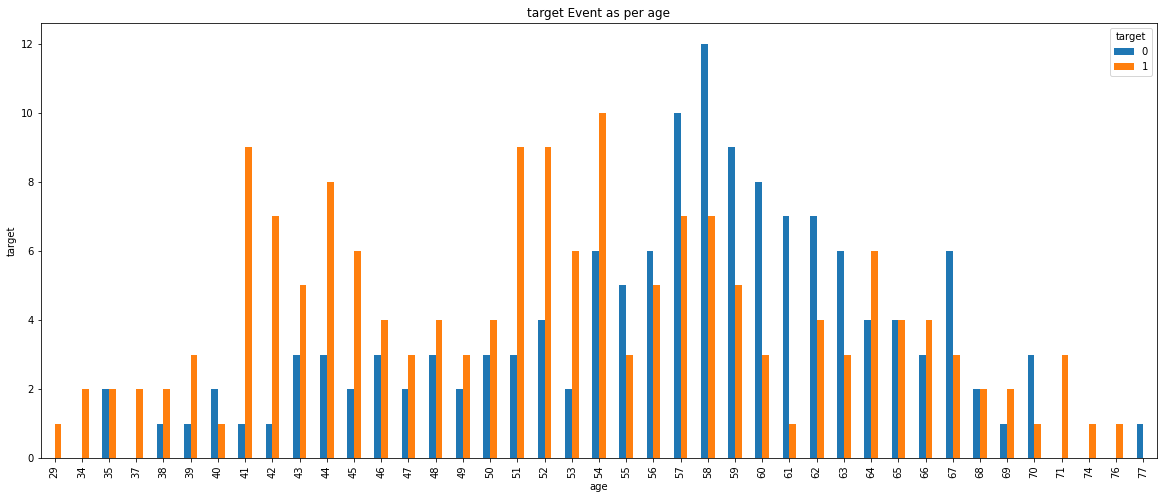

In [ ]:
pd.crosstab(data['age']  ,data['target']).plot(kind='bar',figsize=(20,8))
plt.title('target Event as per age')
plt.xlabel('age')
plt.ylabel('target')
plt.show()

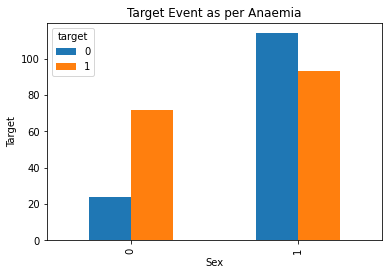

In [ ]:
pd.crosstab(data['sex']  ,data['target']).plot(kind='bar')
plt.title('Target Event as per Anaemia')
plt.xlabel('Sex')
plt.ylabel('Target')
plt.show()

In [ ]:
ds = data['restecg'].value_counts().reset_index()
ds.columns = ['restecg', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="restecg", 
    title='Resting electrocardiographic distribution'
)

fig.show()

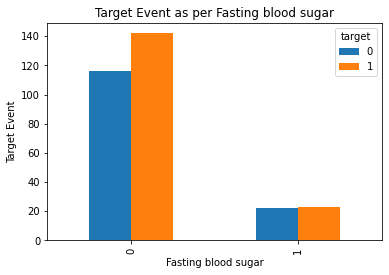

In [ ]:
pd.crosstab(data['fbs']  ,data['target']).plot(kind='bar')
plt.title('Target Event as per Fasting blood sugar')
plt.xlabel('Fasting blood sugar')
plt.ylabel('Target Event')
plt.show()

In [ ]:
ds = data['exang'].value_counts().reset_index()
ds.columns = ['exang', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="exang", 
    title='Distribution of Exercise induced angina'
)

fig.show()

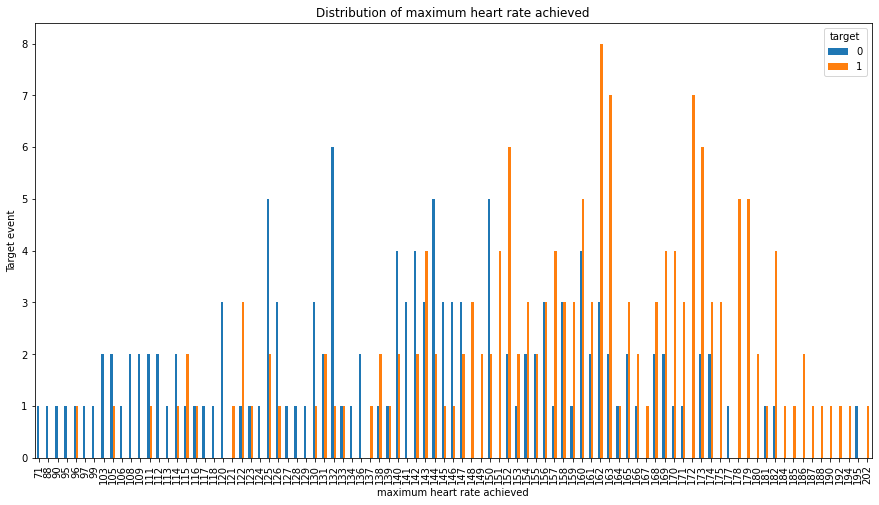

In [ ]:
pd.crosstab(data['thalach']  ,data['target']).plot(kind='bar',figsize=(15,8))
plt.title('Distribution of maximum heart rate achieved')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('Target event')
plt.show()

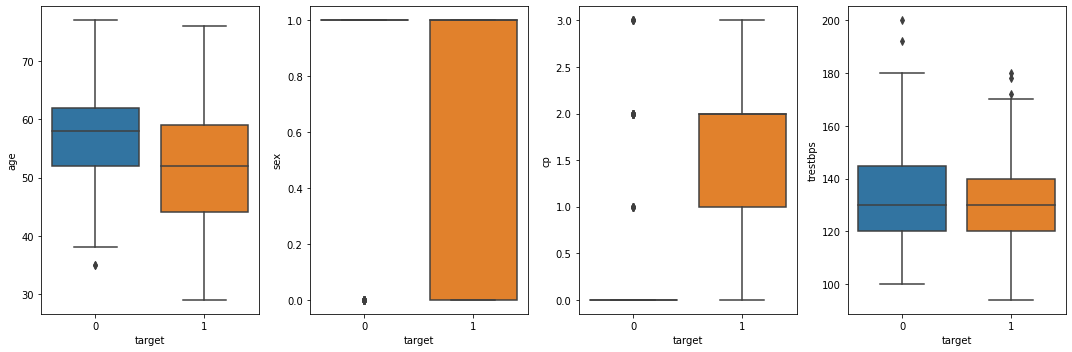

In [ ]:
#detecting outlier
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
titles = list(data.select_dtypes(exclude='category'))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.boxplot(x='target', y=title, data=data, ax=ax)
fig.tight_layout()

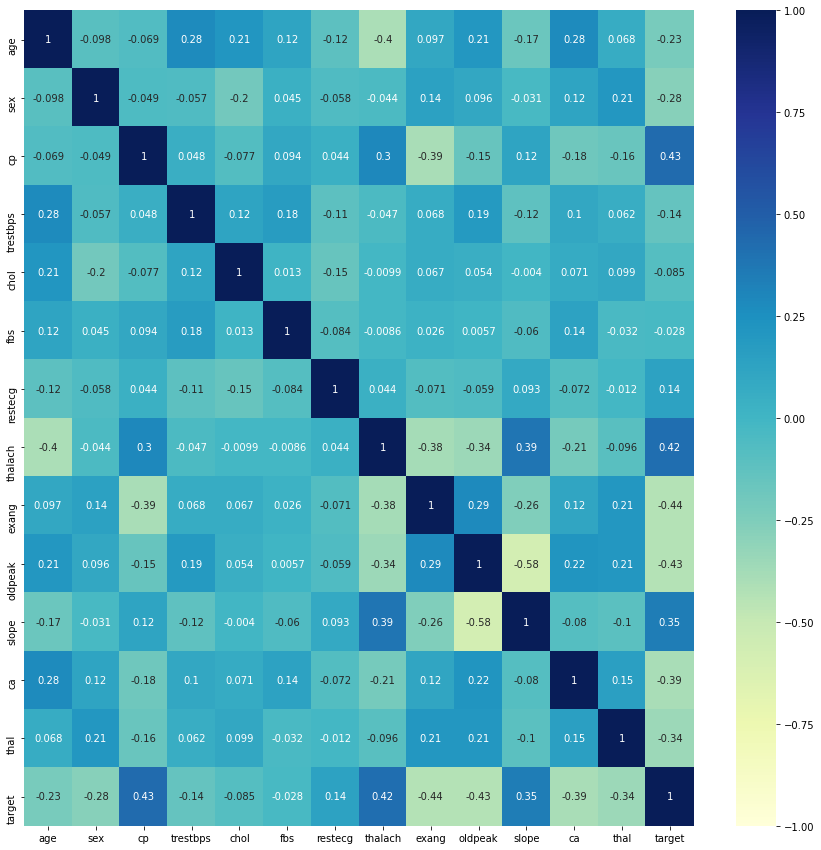

In [ ]:
#correlation heatmap
corr = data.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
corr[abs(corr['target']) > 0.1]['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [ ]:
X = data.drop(['target'],axis = 1)
Y = data['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
Features = ['sex','age','thalach','chol','cp','fbs','trestbps']
x = data[Features]
y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2698)
accuracy_list = []

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 148 to 120
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [ ]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

In [ ]:
dt_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*dt_acc)
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  77.05%


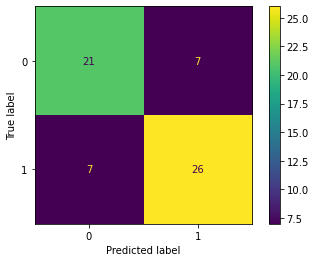

In [ ]:
plot_confusion_matrix(ml, x_test, y_test)
plt.show()

In [ ]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [ ]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  78.69%


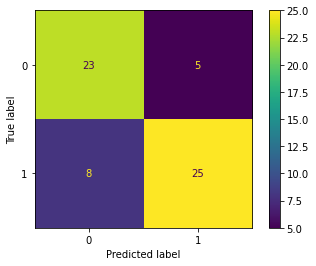

In [ ]:
plot_confusion_matrix(dt_clf, x_test, y_test)
plt.show()

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_clf_prediction = rf_clf.predict(x_test)

In [ ]:
accuracy_score(rf_clf_prediction,y_test)

0.7704918032786885

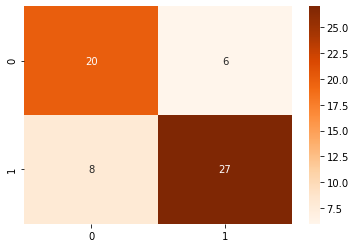

In [ ]:
sns.heatmap(confusion_matrix(rf_clf_prediction,y_test),cmap='Oranges',annot=True)

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_clf_prediction = nb_clf.predict(x_test)

In [ ]:
accuracy_score(nb_clf_prediction,y_test)

0.7377049180327869

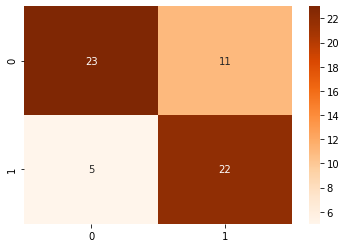

In [ ]:
sns.heatmap(confusion_matrix(nb_clf_prediction,y_test),cmap='Oranges',annot=True)

In [ ]:
xgboost = XGBClassifier(learning_rate=0.05,
                        n_estimators=70,
                        random_state = 0,
                        )
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgboost_model = xgboost.fit(x_train,y_train)
xgb_prediction = xgboost_model.predict(x_test)
accuracy_score(y_test,xgb_prediction)

0.7868852459016393

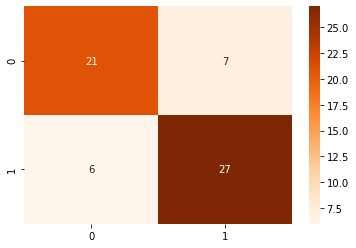

In [ ]:
xgboost_confusion_matrix = confusion_matrix(y_test, xgb_prediction)
sns.heatmap(xgboost_confusion_matrix,cmap='Oranges',annot=True)

In [ ]:
filename = "xgb_model.pkl"
pickle.dump(xgboost_model,open(filename,'wb'))